# Project Name - Play Store App Review Analysis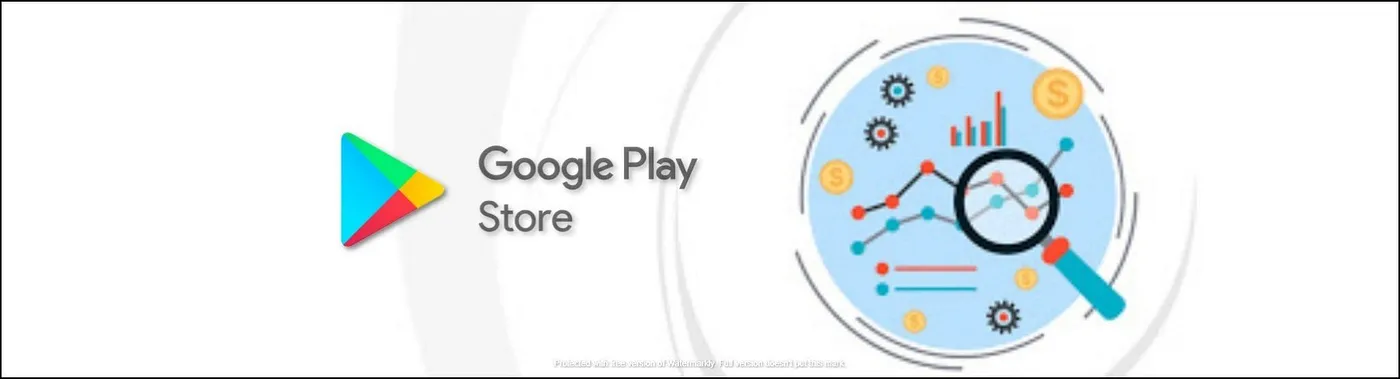

##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual
##### **Team Member 1 -** Nikhil Nagesh Nigudkar


# **Project Summary -**

* Android is most popular Operating System with 2.5 Billion active user. Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.

* Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

* <b>Goals of Project</b> - The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

* The Objective of our project to Explore and analyse the Data to discover key factor responsible for app engagement and recommend best fit and features that would lead to app success

* We have tried to discover the relationships among various attributes such as which application is free or paid, what are the user reviews, rating of the application.





# **GitHub Link -**

https://github.com/NIKHILNIGUDKAR/EDA-Play-Store-App-Review-Analysis

# **Problem Statement**


**Android is expanding as an operating system. It has captured around 74% of the total market which is a true indicator of the huge amount of population using android. Our goal is to help android developers to know what is the motivating factor for people to download an app. It will also help to find out the factors that affect someone’s decision to download an app. I would like to analyse category, reviews, price, ratings and installs for this purpose and find out how they are inter related.**


#### There have some Problem Statements that are very useful for finding the insight from given Dataset -

* Which category has most number of installations.
* Top 5 poor app in refrence of installation.
* Top Category on Play Store.
* How Rating is important for Application.
* Find number of app in refrence of Free or Paid.
* Top 5 app with the maximum installation.


#### **Define Your Business Objective?**

##### The objective of my analysis is to provide insights about android applications and their categories.

* To deep dive in data for the factors of influences on an application, to know why and how certain applications succeed and others.
* Finds the key Factor that are responsible for app engagement.
* Study the detailed information of app and analyse them.
* Finds which attributes are most important for application.
* To know what is required for an application to be considered as successfully topping the charts

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

plt.rcParams.update({'font.size':14}) #fontsize for whole notebook
#To keep graph visible even after disconnet  import %matplotlib inline
%matplotlib inline


### Dataset Loading

In [2]:
# Load Dataset and Loading the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading data file
dir_path = '/content/drive/MyDrive/Classroom/'
file_name = 'Play Store Data.csv'
playstore_file_path = dir_path + file_name
df = pd.read_csv(playstore_file_path)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [5]:
# Dataset First Look
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(10841, 13)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate = df.duplicated().sum()
print(duplicate)

483


**When we see duplicate counts we found 483 duplicate values**



#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


<Axes: >

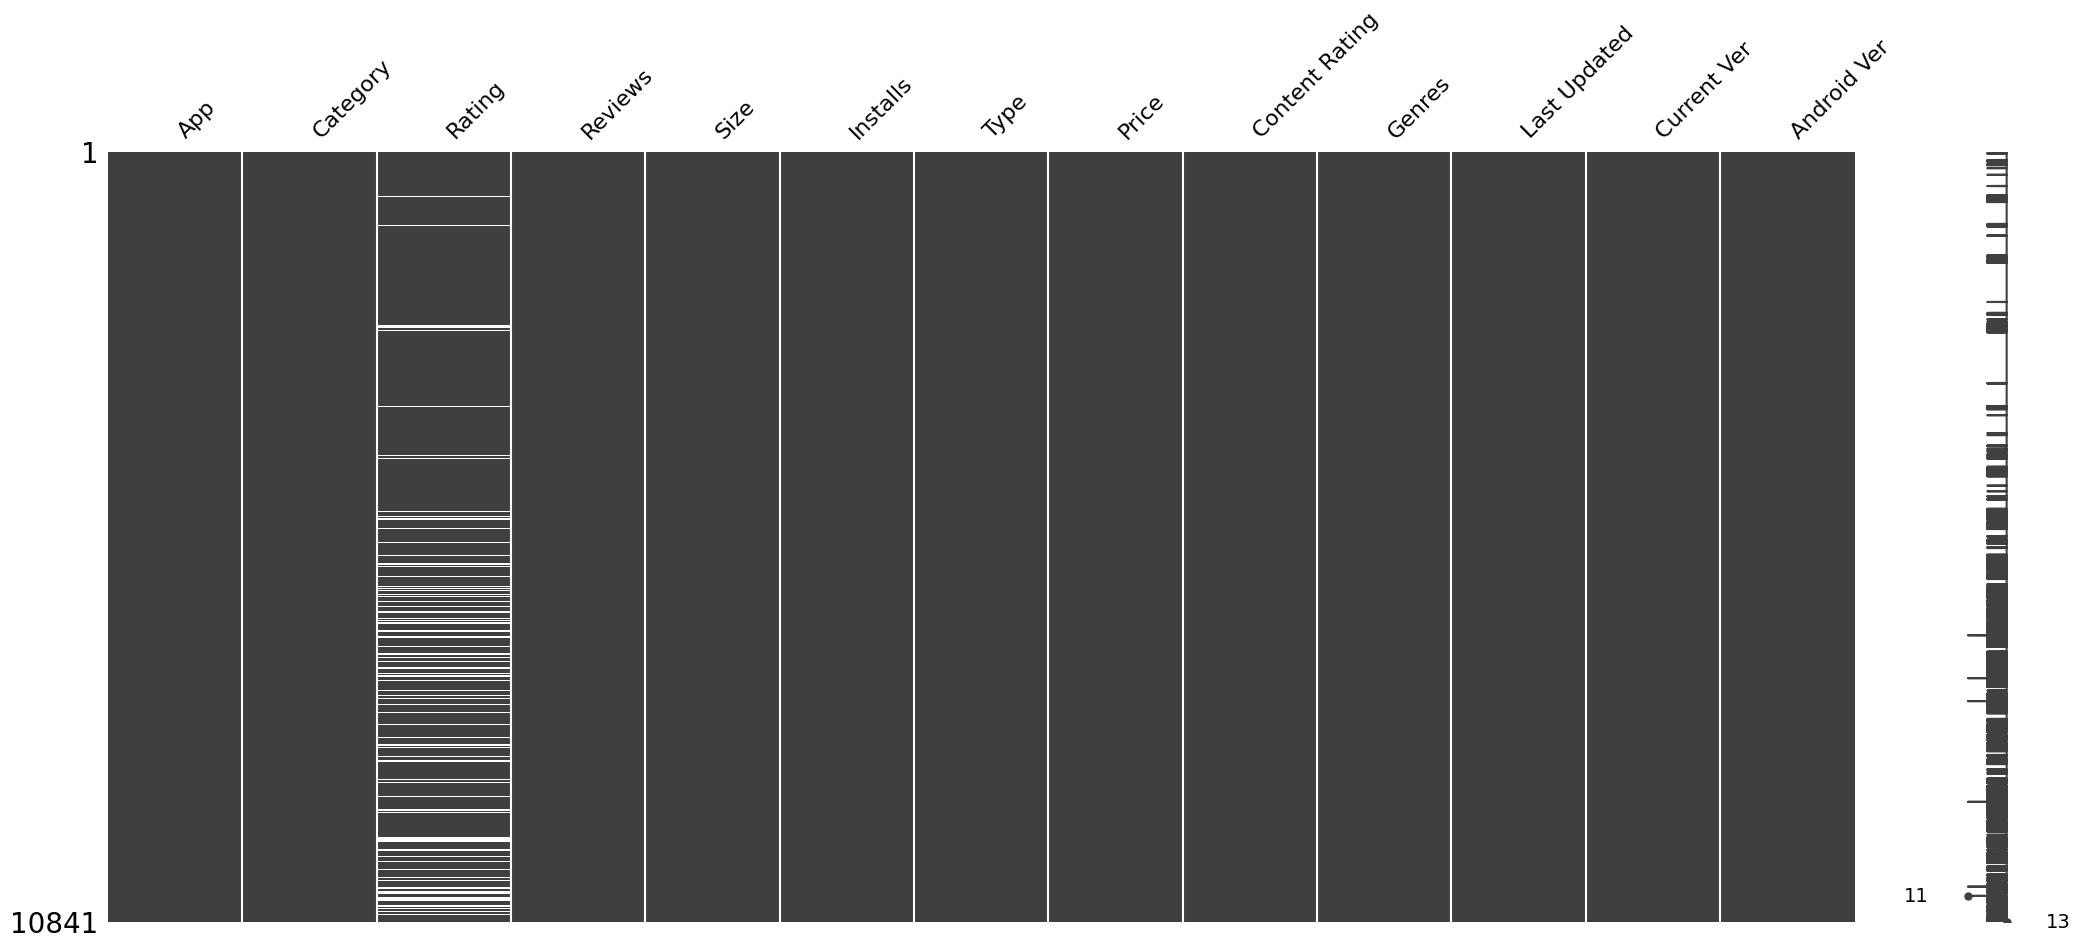

In [10]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

we see that *except ratings other values are of object type*, so we need to evalvulate the fields with respect to there values such as int or other respective column type.

Following are the counts for null values:

1. Ratings : 1474
2. Type : 1
3. Content Rating : 1
4. Current Ver : 8
5. Android Ver : 3

**The following columns are listed in the dataframe**


* App : indicates the name of the apps (this column has duplicate values in the rows)
* Category : this indicates the various categories of the apps
* Rating: this indicates the ratings recieved by the respective apps
* Reviews: this indicates the number or reviews recieved by the app
* Size :indicates the size of the app
* Installs: indicates the number of installs of the respective app
* Type: Shows the type of the app which is free or paid
* Price: this field shows the price of the fields, 0 for free and amount if paid
* Content Rating:shows the targated audiance of the app and what type of audiance has reviewed the app
* Genres: shows the Genre of the app, (same as category)
* Last Updated: shows the latest date of the app that has updated
* Current Ver: shows the latest version of the app
* Androaid Ver: shows the version of android which can support the given app

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


### Variables Description

**The following columns are listed in the dataframe**

1.App : indicates the name of the apps (this column has duplicate values in the rows)
2. Category : this indicates the various categories of the apps
3. Rating: this indicates the ratings recieved by the respective apps
4. Reviews: this indicates the number or reviews recieved by the app
5. Size :indicates the size of the app
6. Installs: indicates the number of installs of the respective app
7. Type: Shows the type of the app which is free or paid
8. Price: this field shows the price of the fields, 0 for free and amount if paid
9. Content Rating:shows the targated audiance of the app and what type of audiance has reviewed the app
10. Genres: shows the Genre of the app, (same as category)
11. Last Updated: shows the latest date of the app that has updated
12. Current Ver: shows the latest version of the app
13. Androaid Ver: shows the version of android which can support the given app

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of variables in {column} column are: {res}")

The number of variables in App column are: 9660
The number of variables in Category column are: 34
The number of variables in Rating column are: 41
The number of variables in Reviews column are: 6002
The number of variables in Size column are: 462
The number of variables in Installs column are: 22
The number of variables in Type column are: 4
The number of variables in Price column are: 93
The number of variables in Content Rating column are: 7
The number of variables in Genres column are: 120
The number of variables in Last Updated column are: 1378
The number of variables in Current Ver column are: 2833
The number of variables in Android Ver column are: 34


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
def convert_int(x):
  ''' this function takes the object and removes ',' + , M, k, $ returns it
  after evalvating by the function eval
  '''
  # print('Evalvating...')
  # try:

  if x.isdigit():         # Checking if the object is alread integer to and converting it before itterating if loops for making the function more optimised
      return eval(x)
  else:
      if ',' in x:          #writing series of if condition to reduce the operations complexity on the objects
        x=x.replace(',','')
      if '+' in x:          #this occurs in installs colum, so we are removing the same to have a proper int format
        x=x.replace('+','')
      if 'M' in x:
        x=x.replace('M','')        # since this value occurs in Size we are converting Millions to int format by adding 6 zeros to the same
        x= eval(x)
        x = x * 10**6
        return x
        # x=x.replace('M','')
      if 'k' in x:          # since this value occurs in Size we are converting Kilo to int format by adding 3 zeros to the same
        x=x.replace('k','')
        x = eval(x)
        x= x * 10**3
        return x
        # x=x.replace('k','')
      if '$' in x:
        x=x.replace('$','') #this occurs in price column, so we are taking out the $ symbol
      if x=='Free' or x=='Varies with device'or x=='Everyone':    #there are some columns entered with missplaced values, setting them to zero.
        x=0
      else:
        x= eval(x)
      return x

In [15]:
df['Reviews'] = df['Reviews'].apply(convert_int)
df['Size'] = df['Size'].apply(convert_int)
df['Installs'] = df['Installs'].apply(convert_int)
df['Price'] = df['Price'].apply(convert_int)

### What all manipulations have you done and insights you found?

After doing various analysis accross apps, the following manipulations are done



In [16]:
# we see that there is one rating value that is 19 which could be human error, this may affect the median value in further steps, so we set it as 1.9.
df.loc[df['Rating'] == 19, 'Rating'] = 1.9

In [17]:
x = df.Rating.unique()
x.sort()
print(x)

[1.  1.2 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5.  nan]


In [18]:
#replacing underscore values by space
def remove_underscores(x):
  if '_' in x:
    x = x.replace('_', ' ')
  return x

In [19]:
# applying 'remove_underscores' function on category column

df['Category'] = df['Category'].apply(remove_underscores)

In [20]:
#finding null values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**we see that the following are null values.**

1. Rating: 1474

2. Type: 1

3. Content Rating: 1

4. Current Ver: 8

5. Android Ver: 3

**since there are many values in ratings that can be replaced with median values**


<Axes: title={'center': 'Distribution plot of Rating Feature'}, xlabel='Rating', ylabel='Count'>

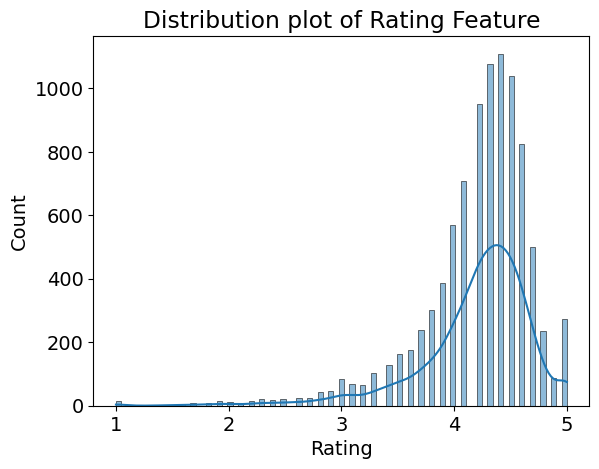

In [21]:
plt.title('Distribution plot of Rating Feature')
#By ploting distribution plot we can choose between mean amd median.
sns.histplot(df['Rating'],kde = True)


In [22]:
# In this case we use median to have A Normal Distribution
median_value_for_ratings = df['Rating'].median()
median_value_for_ratings = round(median_value_for_ratings, 2)
df['Rating'] = df['Rating'].fillna(median_value_for_ratings)
print(f'the values for null us updated as {median_value_for_ratings}')

the values for null us updated as 4.3


In [23]:
#since the other values are minum null values, we drop them
df = df.dropna(subset = ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [24]:
#Dataset Duplicate Value Count
dup = df['App'].duplicated().sum()
print(dup)

1181


**we see that there are 1181 duplicated rows in app names colums, so we are keeping the first and dropping the remaing**

In [25]:
#we see that there are duplicate names off apps in apps column, so dropping duplicates and keeping first
df = df.drop_duplicates(subset=['App'],keep="first")

**Summary of data Manipulation**

* Rating had 1474 null values which contributes 13.60% of the data so * The null values are replaced by median ie 4.3
The following null values are dropped

    * Type had 1 null value which contributes 0.01% of the data.
    * Content Rating had 1 null value which contributes 0.01% of the data.
    * Current Ver had 8 null values which contributes 0.07% of the data.
    * Android Ver had 3 null values which contributes 0.03% of the data.
The following actions are taken

* Removed Outliers from Rating column.
* Removed underscore from Required columns.
* Converted the Data types from object to int or float.
* Handling the missing value.
* Solving the Structural Error.

**After data cleaning and manipulation, we are now again analysing the data for understanig if all the discrepancies are gone**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   float64
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [27]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9.648000e+03,9.648000e+03,9648.000000
mean,4.192465,2.168369e+05,1.781989e+07,7.786211e+06,1.100193
std,0.496552,1.832349e+06,2.150200e+07,5.378830e+07,16.861727
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Free Vs Paid apps with respect to categories**

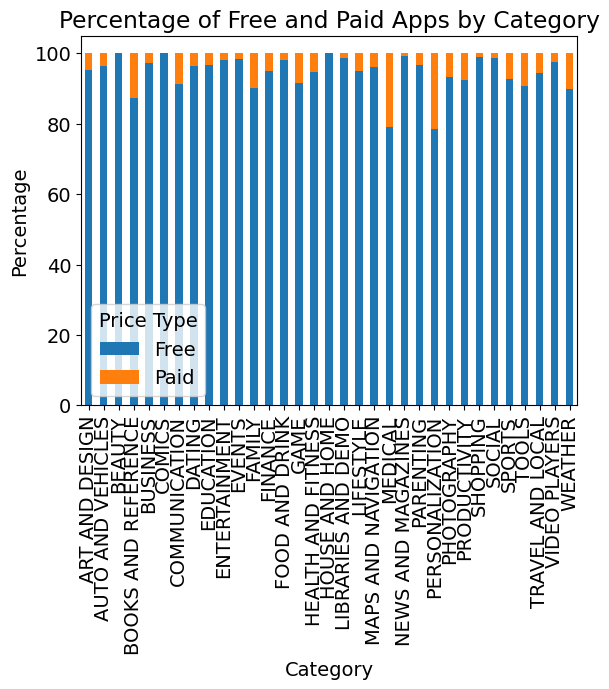

In [29]:
# Chart - 1 visualization code
# Chart - 3 visualization code
category_price_counts = df.groupby(['Category', 'Type']).size().unstack()

#plotting
total_counts = category_price_counts.sum(axis=1)
category_price_ratios = category_price_counts.div(total_counts, axis=0) * 100

# create a stacked bar chart
category_price_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of Free and Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Price Type')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar plot shows the percentage for all app categories by type(free and paid)



##### 2. What is/are the insight(s) found from the chart?

We se that the percentage of paid apps in personelization and Medical are more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer the ratio in percent wise distrubution at category level in the above plot, we see that the percent of Personalization and Medical app have more number of paid apps compare to other categories

#### Chart - 2

**Number of Apps Per Category count plot and Pie plot(pie code is commented)**

Text(0, 0.5, 'Number of Apps')

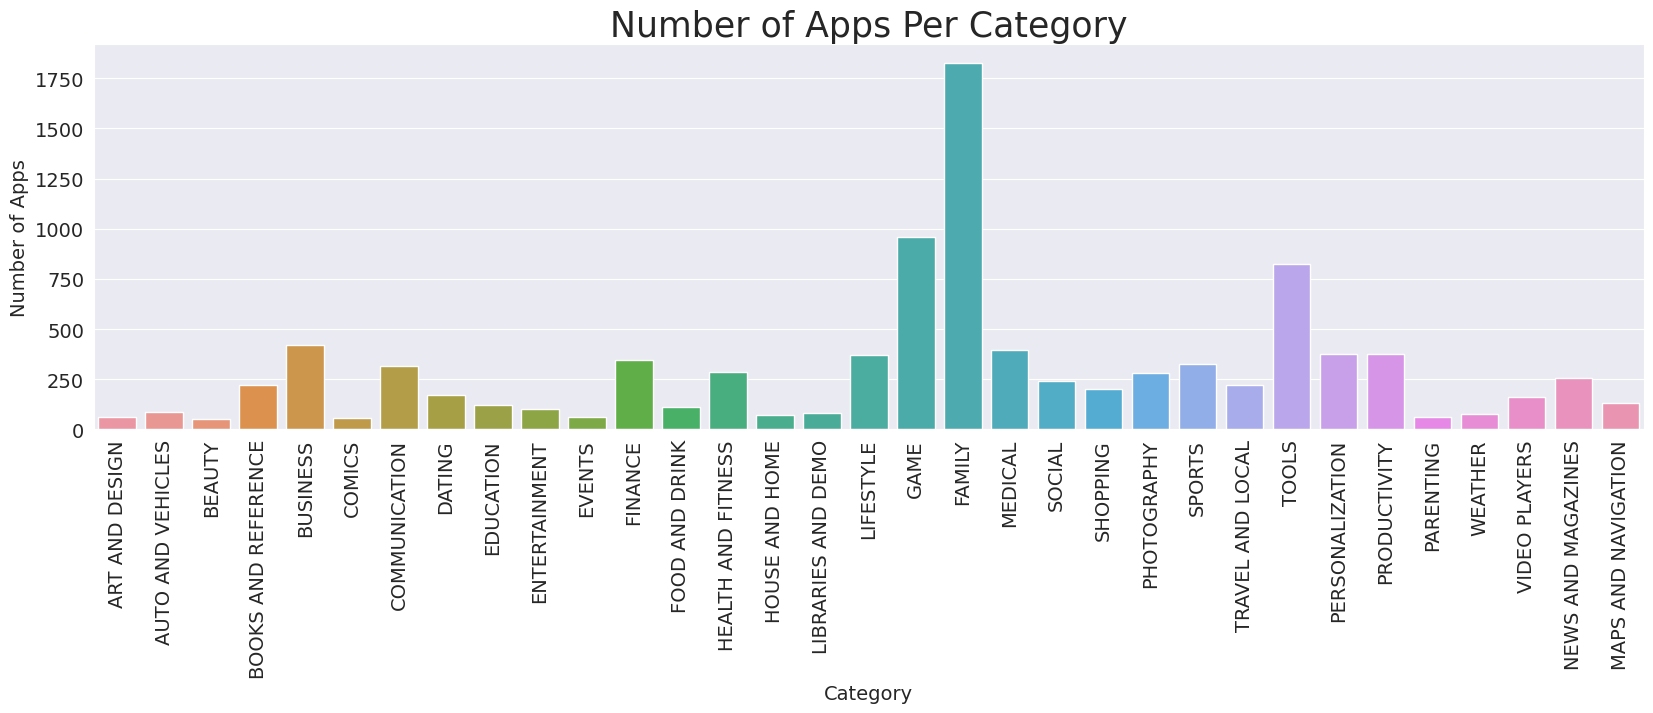

In [30]:
# Chart - 2 visualization code
# Get the number of apps for each category using Count Plot

sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))

sns.countplot(x='Category', data=df)

plt.title('Number of Apps Per Category', fontsize = 25)
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')



##### 1. Why did you pick the specific chart?

We have plotted 2 types of chart to get the understanding for better, seaborn count plot and Pie(the commented code) explain better way to demonstrate the share of the number of apps accross various categories.

##### 2. What is/are the insight(s) found from the chart?

We find that the number of apps in Family category is 18.5% followed by Games with 9.94% and tools app with 8.55%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We see that there are many apps in family, games and tools category, this plot can help us to understand the market size of the category in which we are trying to make our new app

#### Chart - 3

**Comparision of users using paid app and free app**

Text(0.5, 1.0, 'Type Distribution')

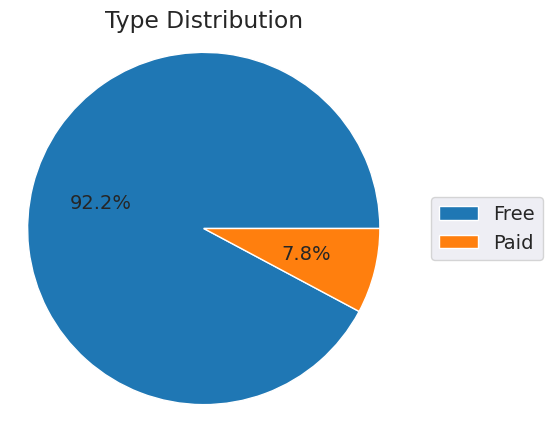

In [31]:
# application type distribution
#Here we use pie plot
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
number_of_apps = df['Type'].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values

# plotting the same
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Type Distribution')
# plt.show()

##### 1. Why did you pick the specific chart?

A pieplot shares the distribution of apps by their type(free or paid) very clearly.

##### 2. What is/are the insight(s) found from the chart?

We see that the total number of apps which are paid are 7.8% and rest are free.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is observed that the majority of apps that are publised are free to use and very less number of apps are paid



#### Chart - 4

**lowest raiting for the apps with respect to categories**

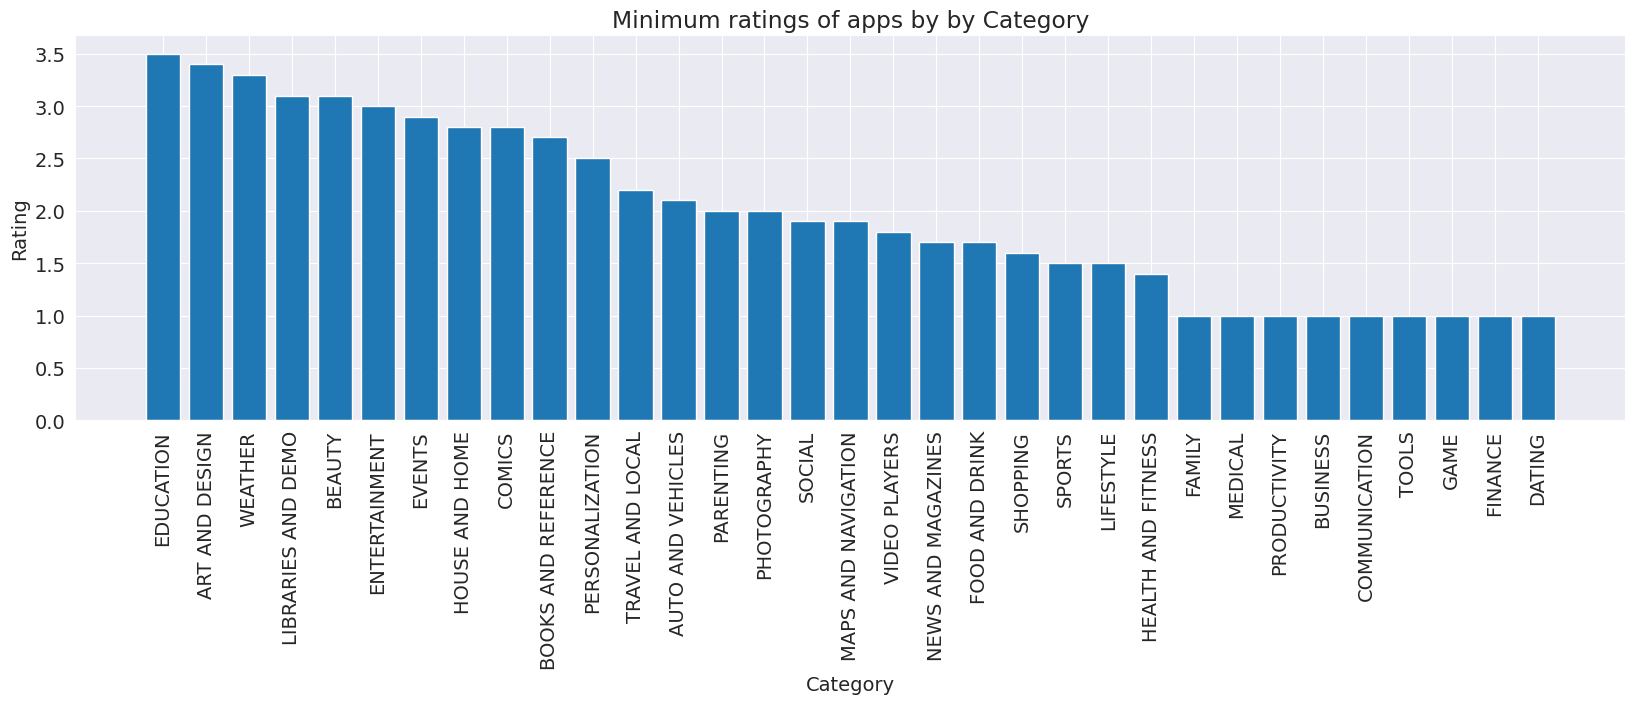

In [32]:
# Chart - 4 visualization code

# Chart - 2 visualization code
# heights ratings with respect to category
category_avg_ratings = df.groupby('Category')['Rating'].min().sort_values(ascending = False)

# plotting
plt.rcParams['figure.figsize'] = (20, 5)
plt.bar(category_avg_ratings.index, category_avg_ratings.values)
plt.title('Minimum ratings of apps by by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)

plt.show()

##### 1. Why did you pick the specific chart?

we are ploting minimum values against each category, so Bar chart would be best suited for the visualization to understand whch category has lowest raitings and which has heighest

##### 2. What is/are the insight(s) found from the chart?

We see that there are apps in the category that has lowest raiting and through this we can identify the category in which we can work on by exceptionally making a better app.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As a result we can see that there are many apps with lowest raiting and we have hope or chance to bring a better app to the market.

#### Chart - 5

**Total app installs in each category**

Text(0.5, 1.0, 'Total app installs in each category')

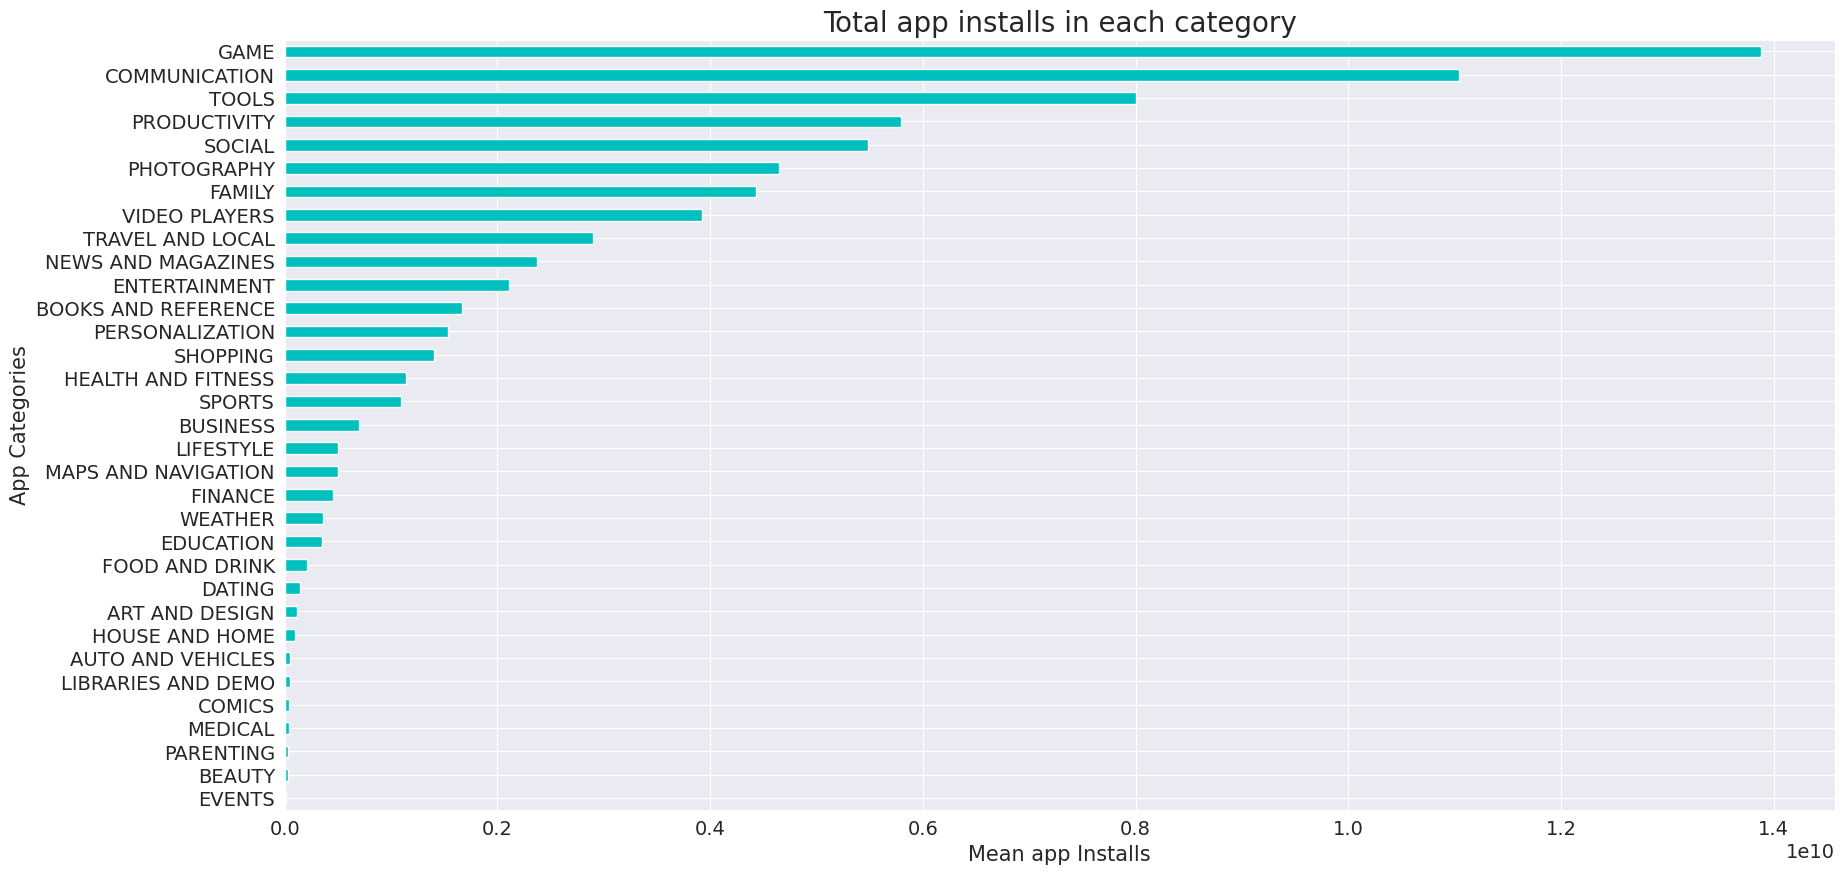

In [33]:
# Chart - 5 visualization code
Max_Installs = df.groupby(['Category'])['Installs'].sum().sort_values()

#plotting
Max_Installs.plot.barh(figsize=(20,10), color = 'c', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Mean app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

##### 1. Why did you pick the specific chart?

Pie plots are usually best for sharing visually distribution of data

##### 2. What is/are the insight(s) found from the chart?

We found that most of the apps are open to be reviewed by Everyone.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When we see correlation between app installs and review we see that the correlation is around 0.61, which is a good to have. It is recommended to have reviews open to everyone to gain more installs

#### Chart - 6

**sentiments analysis**

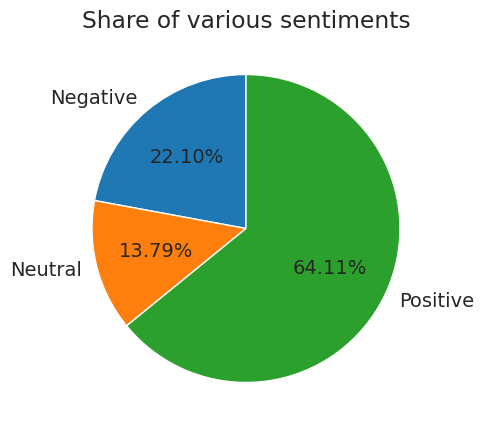

In [34]:
#visualization code
#importing the user Reviews CSV as user_df
user_df = pd.read_csv(dir_path + 'User Reviews.csv')

# grouping and plotting sentinments
sentiment_group = user_df.groupby('Sentiment')
s = sentiment_group['Sentiment'].count()
#setting plot size
plt.figure(figsize=(5,5))

# plotting pie
plt.pie(s, labels = s.index,  startangle = 90,autopct='%1.2f%%')

#Describing details for the plots
plt.title('Share of various sentiments')
plt.show()

##### 1. Why did you pick the specific chart?

pie charts are better to demonstrate the proportions of the values

##### 2. What is/are the insight(s) found from the chart?

we see that there are many apps that are having positive sentiments respect to various apps

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We observe that most of the apps that recied translated reviews are positive.


#### Chart - 7

**Content rating of the apps for various group of people**

Text(0.5, 1.0, 'Content Rating')

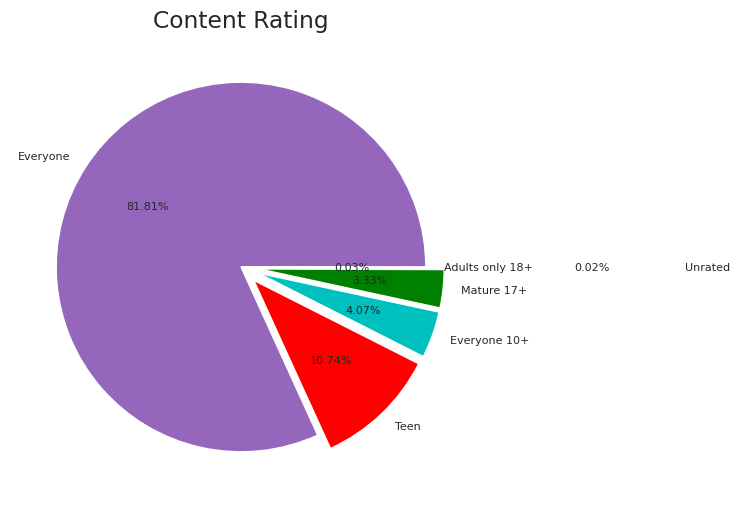

In [35]:
# Chart - 7 visualization code
# Content rating of the apps for diff age group of people
data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(6,6))
explode=(0,0.1,0.1,0.1,0.0,1.3)
color = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = color, autopct='%.2f%%',explode=explode,textprops={'fontsize': 8})
plt.title('Content Rating')
# plt.legend()


##### 1. Why did you pick the specific chart?

Pie plots are usually best for sharing visually distribution of data.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the apps are open to be reviewed by Everyone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When we see correlation between app installs and review we see that the correlation is around 0.61, which is a good to have. It is recommended to have reviews open to everyone to gain more installs.

#### Chart - 8

**Paid app counts with respect to price (excluding free apps)**

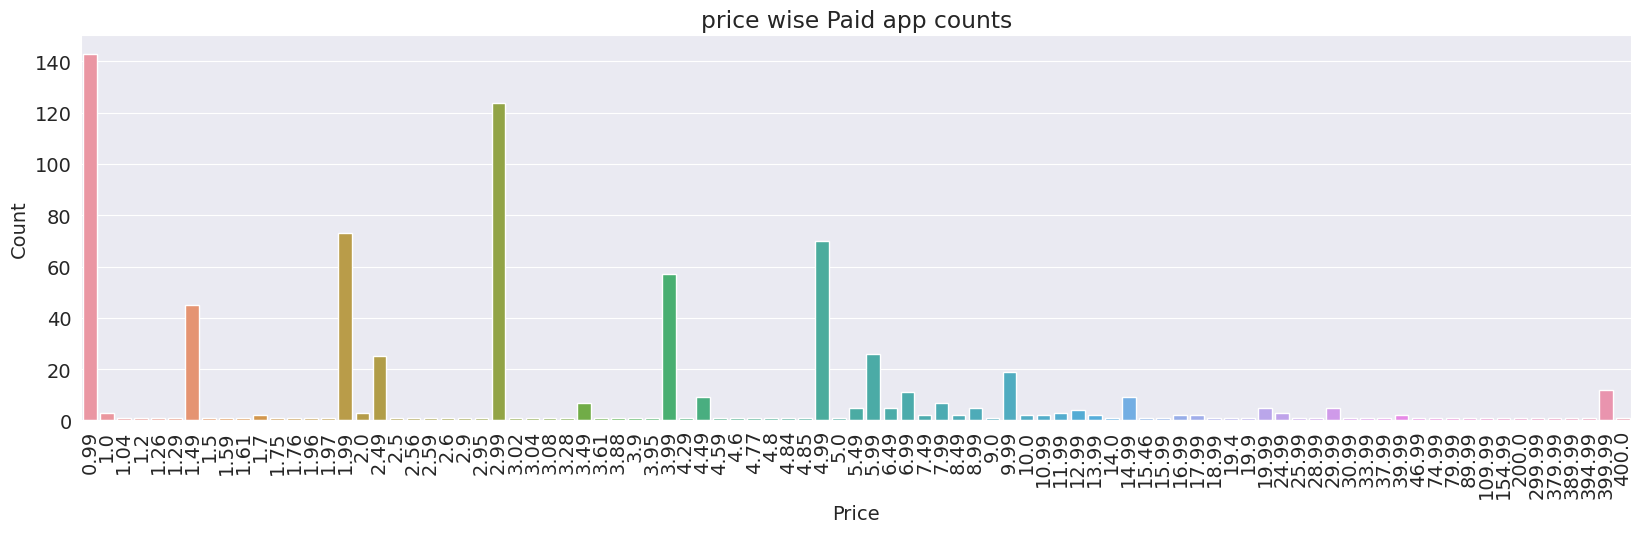

In [36]:
# Chart - 8 visualization code
#the plot shows the paid app counts with respect to price excluding free apps

free_app_value = 0
plt.rcParams['figure.figsize'] = (20, 5)
df_without_free_apps = df['Price'] != free_app_value
sns.countplot(data=df[df_without_free_apps], x='Price')

plt.xticks(rotation=90)
plt.title('price wise Paid app counts')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A seaborn count plot shows counts of the app with respect to various values, here we wanted to know the counts of apps with price not equal to 0, so we used the above chart.

##### 2. What is/are the insight(s) found from the chart?

we see that max app belong to price = 0.99 Followed by 2.99.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is observed that there many apps are released with amount = 0.99 and 2.99

It would be a good practice if we can make sure the app falls in this price range to make sure the apps are affordable.

#### Chart - 9

**Ratings wrt Category (Box plot)**

Text(0, 0.5, 'Rating')

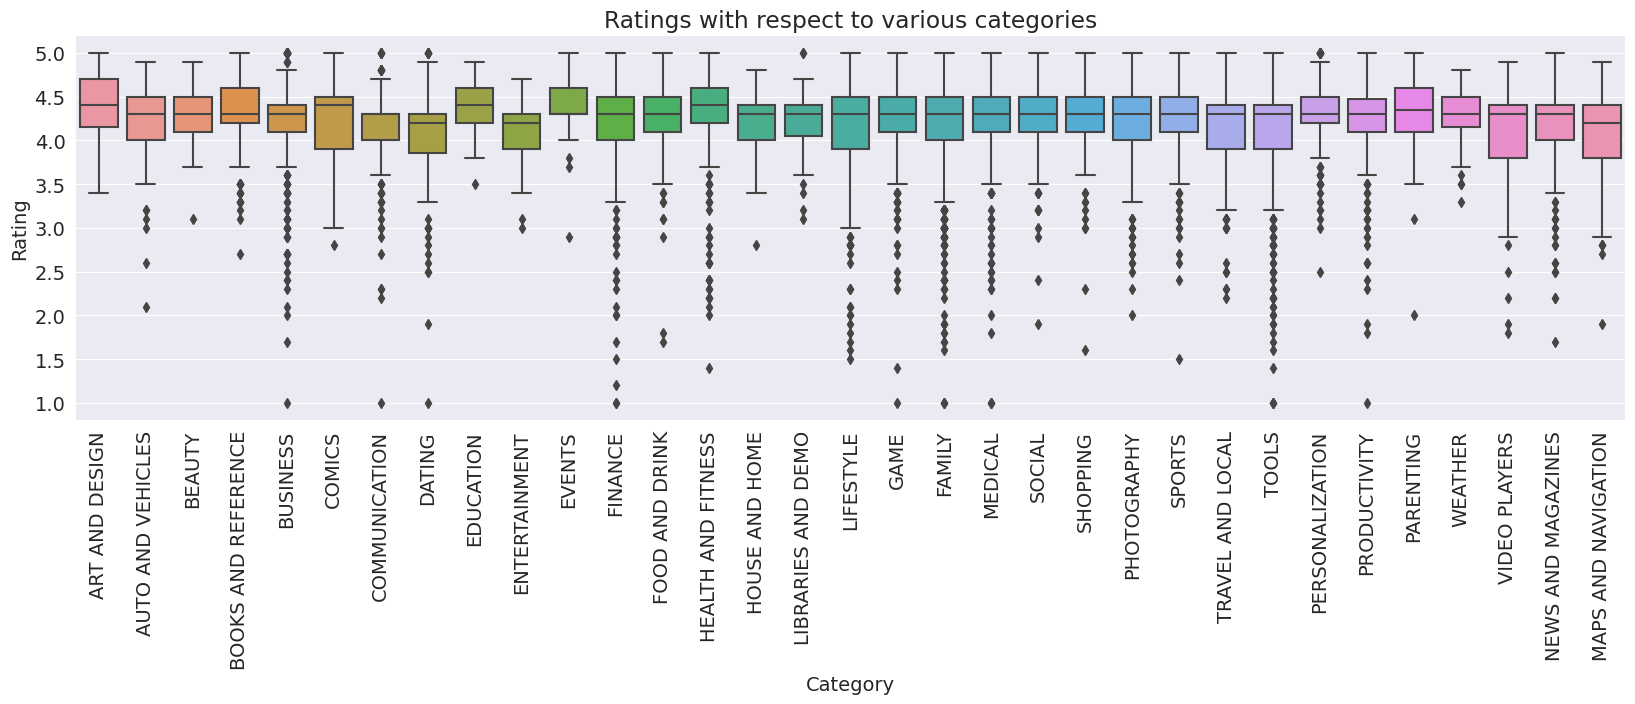

In [37]:
# Chart - 9 visualization code
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (15, 5)

#Plot Code
sns.boxplot(data=df, x="Category", y="Rating")

#Describing details for the plots
plt.title('Ratings with respect to various categories')
plt.xlabel('Category')
plt.ylabel('Rating')

##### 1. Why did you pick the specific chart?

Boxplots provides a concise summary of measures such as the median, quartiles, and outliers.

This makes it easy to compare multiple datasets quickly and identify any differences or similarities.



##### 2. What is/are the insight(s) found from the chart?

Communication and events have their medians outside the box, which means the ratings recieved are not skewed

There are many outliers in various category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The outliers below the boxes show that various apps in category are having a bad reviews so there is room for placing our app with better features in the categories with more wiskers in box plot below the boxes.

#### Chart - 10

**Distribution of ratings across various apps**

Text(0, 0.5, 'Count')

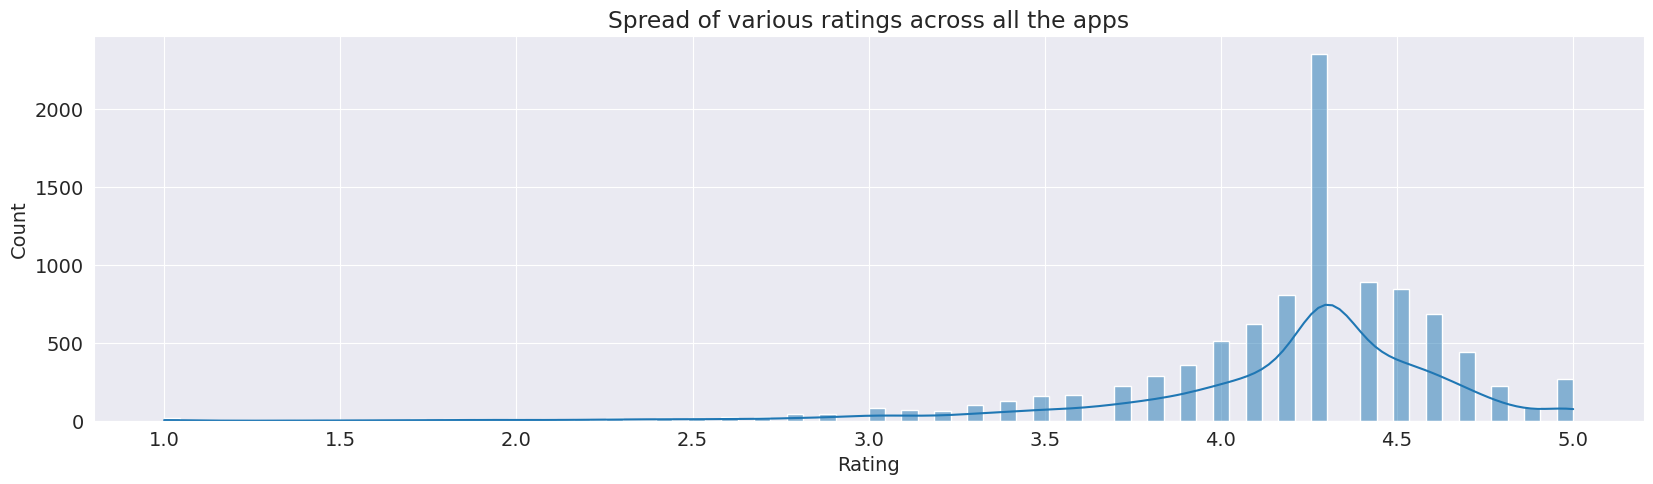

In [38]:
# Chart - 10 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
sns.histplot(df, x='Rating', kde=True)

#Describing details for the plots
plt.title('Spread of various ratings across all the apps')
plt.xlabel('Rating')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Hist plots are better to analyze distribution of numeric values.


##### 2. What is/are the insight(s) found from the chart?

we see that most of the apps have a rating of 4.25.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

since most of the apps have 4.2 rating, there is an opportunity to have a better app that could fit the market needs.

#### Chart - 11

In [39]:
# Chart - 11 visualization code
merge_df =pd.merge(df,user_df,how='inner',on='App')
App_Cat_df = merge_df.groupby(['App','Category'])['Translated_Review'].count().reset_index()
App_Cat_df = pd.DataFrame(App_Cat_df)
App_Cat_df = App_Cat_df.sort_values(by=['Translated_Review'], ascending=False)
App_Cat_df.head(10)


,App,Category,Translated_Review
268,Bowmasters,GAME,312
966,Helix Jump,GAME,273
119,Angry Birds Classic,GAME,273
342,Calorie Counter - MyFitnessPal,HEALTH AND FITNESS,254
357,Candy Crush Saga,GAME,240
582,Duolingo: Learn Languages Free,EDUCATION,240
835,Garena Free Fire,GAME,222
21,8 Ball Pool,GAME,219
341,Calorie Counter - Macros,HEALTH AND FITNESS,200
0,10 Best Foods for You,HEALTH AND FITNESS,194


##### 1. Why did you pick the specific chart?

ANS:Here we are viewing the apps that recieved max translated reviews.



##### 2. What is/are the insight(s) found from the chart?

ANS: we see that mostly the translated reviews are recieved by the Game category

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

ANS: Game category has most number of translated reviews.



#### Chart - 12

**Translated Reviews by categories**

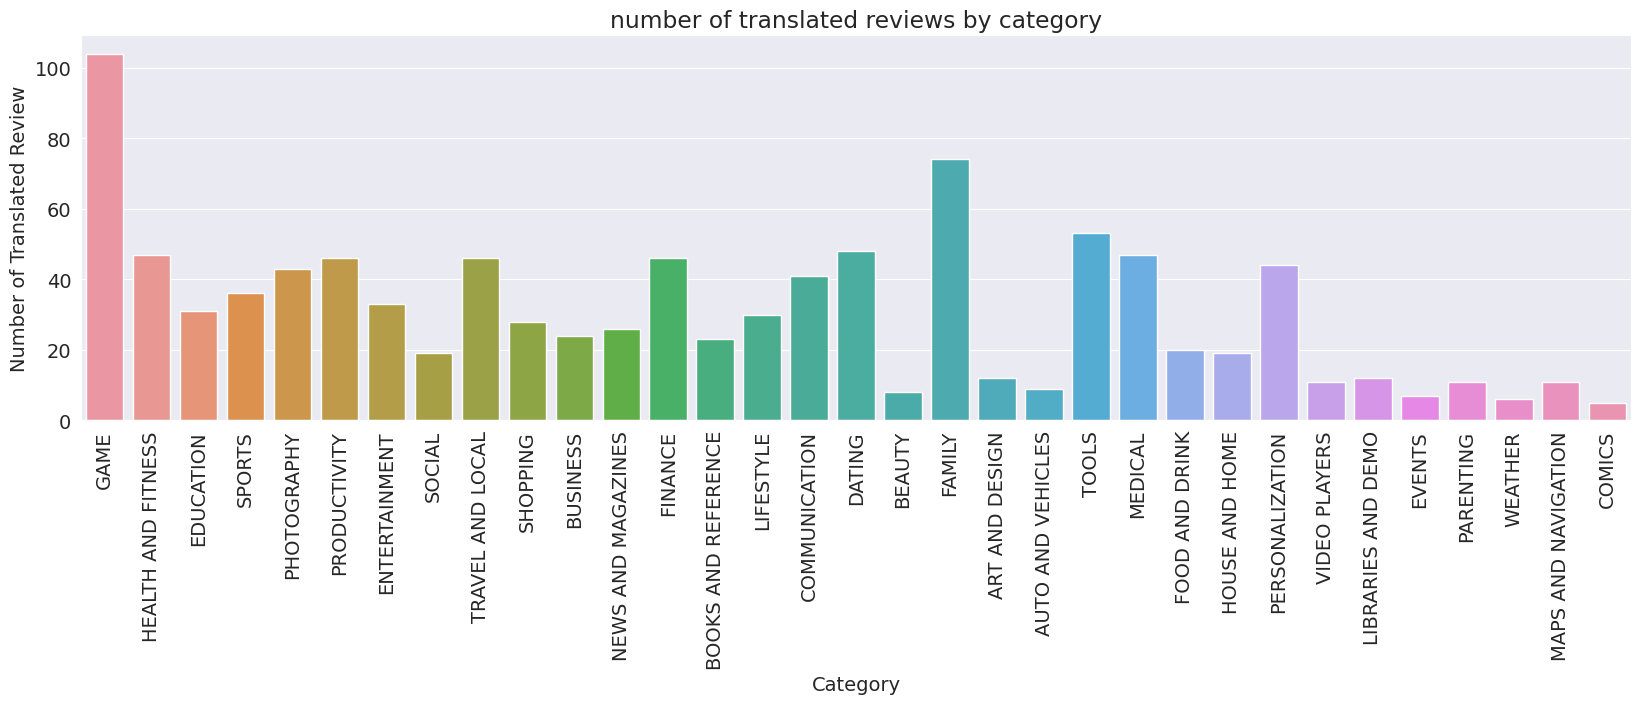

In [40]:
# Chart - 12 visualization code
plt.figure(figsize=(20, 5))

#plotting
sns.countplot(data = App_Cat_df, x = App_Cat_df['Category'])

# Setting attributes to infer the plot
plt.title('number of translated reviews by category')
plt.ylabel('Number of Translated Review')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

A count plot shows better repersentation of the counts with respect to their categories



##### 2. What is/are the insight(s) found from the chart?

We found that the games have recied highest number of counts recieved followed by Family, however the comics weather and events apps have recieved less reviews in the category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Family and games category have recieved more number of translated reviews.

#### Chart - 13

**Sentiment Visualization for GAME, FAMILY, COMMUNICATION, LIBRARIES AND DEMO**

In [41]:
# Chart - 13 visualization code
df.Category.unique()

array(['ART AND DESIGN', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD AND DRINK', 'HEALTH AND FITNESS', 'HOUSE AND HOME',
       'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL AND LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO PLAYERS', 'NEWS AND MAGAZINES', 'MAPS AND NAVIGATION'],
      dtype=object)

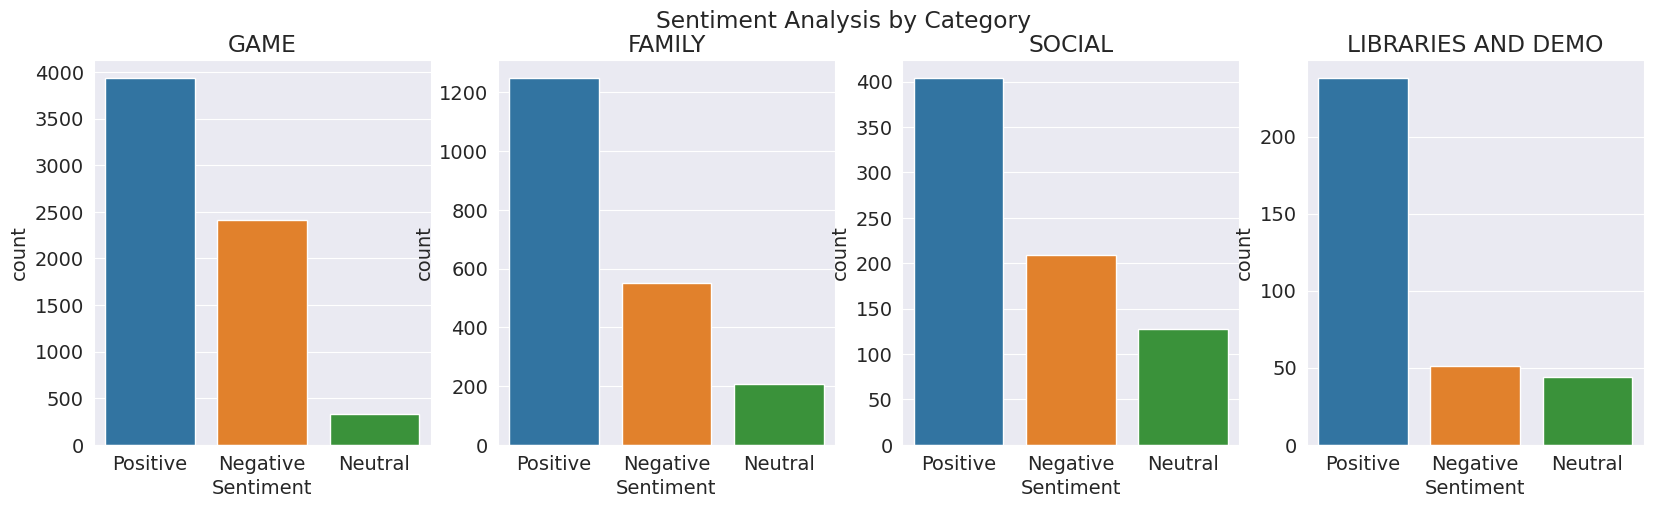

In [42]:
x=['GAME','FAMILY','SOCIAL', 'LIBRARIES AND DEMO']
#we can choose any category and include in the x variable

fig, axes = plt.subplots(1, len(x), figsize=(20, 5))

for i, category in enumerate(x):
    temp_df = merge_df[merge_df['Category'] == category]
    sns.countplot(data=temp_df, x='Sentiment', ax=axes[i])
    axes[i].set_title(category)

fig.suptitle('Sentiment Analysis by Category')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Count plots are best suited to plot the counts of various rows and plot. This helps in Visually intrepreting the various counts

##### 2. What is/are the insight(s) found from the chart?

GAME, FAMILY, SOCIAL, LIBRARIES AND DEMO we see that mostly the apps have positive sentiments towards the given categories

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

ANS: The above charts show that most of the apps in category GAME, FAMILY, SOCIAL, LIBRARIES AND DEMO are having a positive sentiment

We can infer that social app category has approximatly 50% of negative sentiments.

#### Chart - 14 - Correlation Heatmap

Text(0.5, 20.722222222222214, 'Feature/Property')

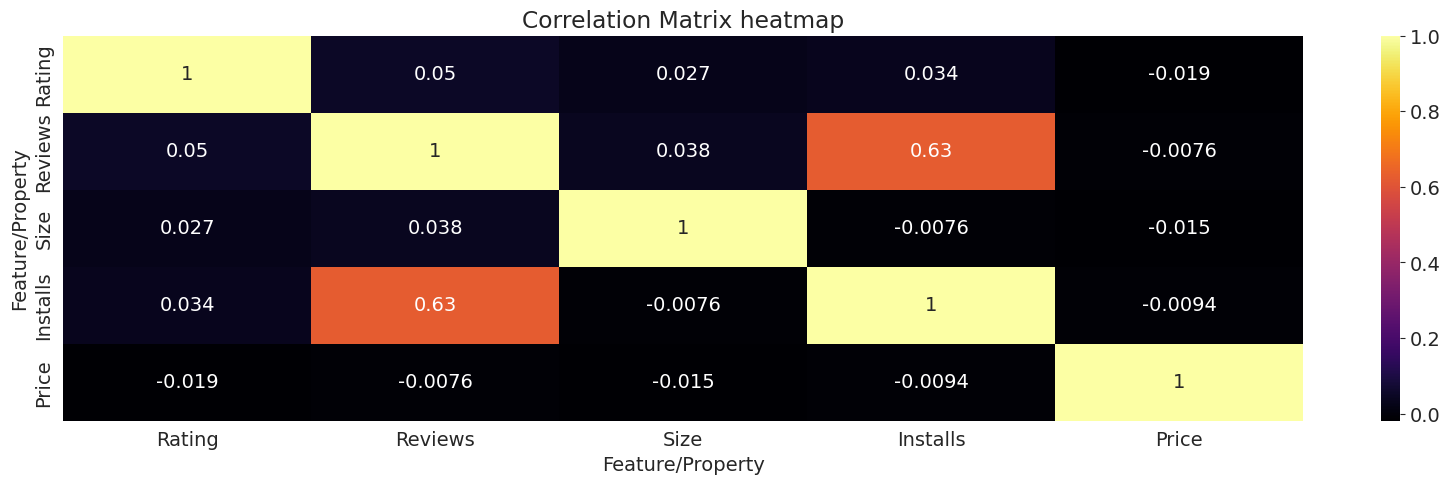

In [43]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')


##### 1. Why did you pick the specific chart?

The best way to plot a correlation matrix is by having a heatmap useing the seaborn Library.

The values in the matrix range from -1 to 1, and represent the strength and direction of the correlation between two variables. A correlation coefficient of -1 indicates a perfect negative correlation, a coefficient of 0 indicates no correlation, and a coefficient of 1 indicates a perfect positive correlation.

##### 2. What is/are the insight(s) found from the chart?

We see that the correlation between Installs and Price is 0.63 which is good, It means that when there are more reviews on any app the more people tend to install the app. so its a better idea to get reviews on the app.

This gained insights are very helpfull to grow a business as we can add the feature to get reviews on the app and this shall help the app to grow.

#### Chart - 15 - Pair Plot

Text(0.5, 0, 'Feature/Property')

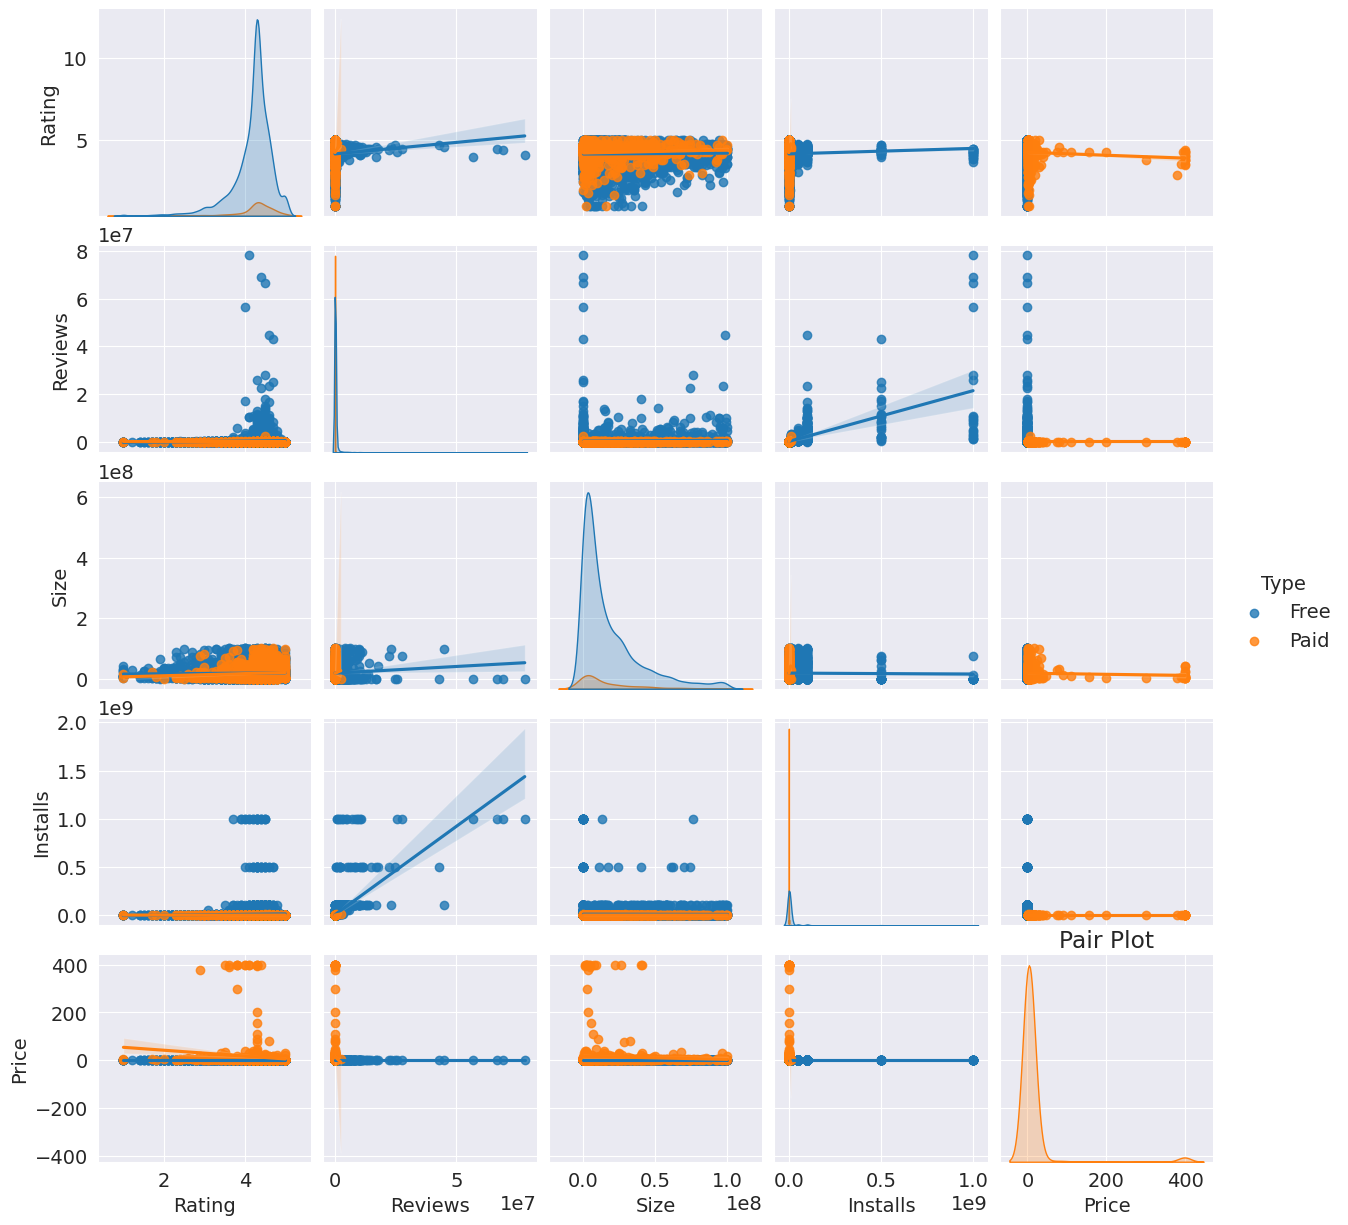

In [44]:
# Correlation Heatmap visualization code
# Pair Plot visualization code
sns.pairplot(df, diag_kind="kde", kind = 'reg', hue = 'Type')

#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.



##### 2. What is/are the insight(s) found from the chart?

we find that there is a relation between the reviews and installs, the max installs the max reviews we get, the regression lines is liner and increases as (x=y approximatly)

The installs doesn't grow as the price increases.

size and installs does not have relation.

the diagonal graphs show the kde plotted wrt the own feature, it is noted that the diagonal plots doesnot follow the scale.



## Chart - 16


**Segmentation of apps by size as extra large, large, medieum and lite size**

In [45]:
# Chart - 16 visualization code
min_size = df.Size.min()
max_size = df.Size.max()

def group_by_size(val):
  ''''
  This function help to categories the size from 101304 to 0
  as Extra Large App, Large App, Medium Size App and Lite Size App
  '''
  if val>=((max_size/4)*3):
    return 'Extra Large App'
  elif val >= ((max_size/4)*2)  and val<((max_size/4)*3):
    return 'Large App'
  elif val >= (max_size/4) and val<((max_size/4)*2):
    return 'Medium Size App'
  else:
    return 'Lite Size App'

In [46]:
df['Size Groups'] = df['Size'].apply(group_by_size)

Text(0.5, 1.0, 'share of apps based on basis of size categories defined by us')

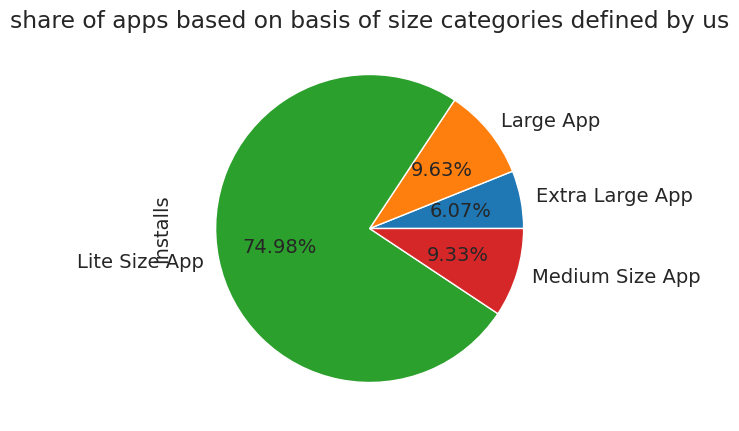

In [47]:
plt.rcParams['figure.figsize'] = (20, 5)
size_group_df = df.groupby(['Size Groups'])['Installs'].sum()
size_group_df.plot.pie(autopct='%1.2f%%')

#setting labels to infer the plot
plt.title('share of apps based on basis of size categories defined by us')


# Chart - 17 visualization code

**Segmentation of apps by size with respect to categories as extra large, large, medieum and lite size**


Text(0, 0.5, 'Total Installs in Billions')

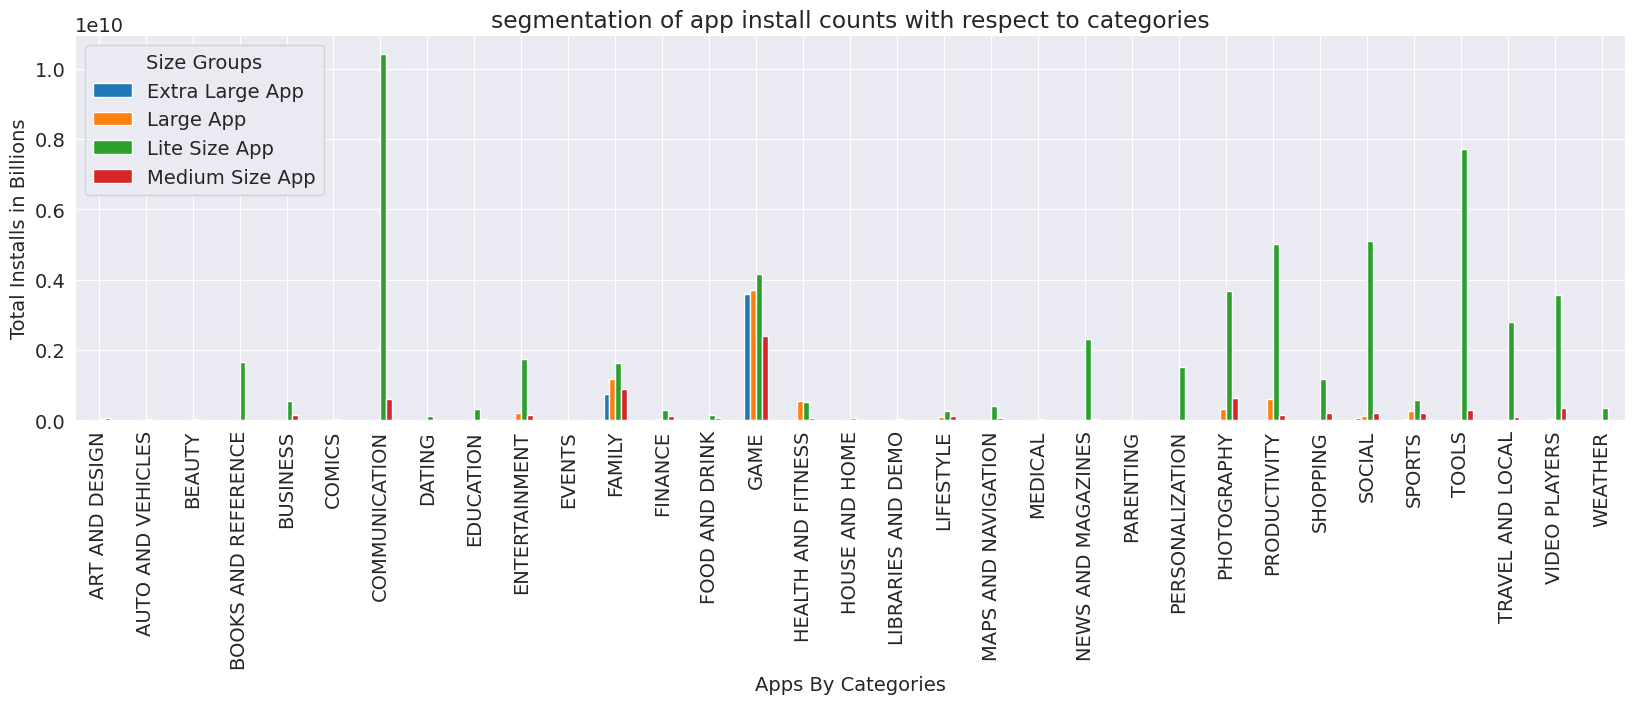

In [48]:
plt.rcParams['figure.figsize'] = (20, 5)
size_groupby_Categories_df = df.groupby(['Category', 'Size Groups'])['Installs'].sum().unstack()

size_groupby_Categories_df.plot.bar()
plt.title('segmentation of app install counts with respect to categories')
plt.xlabel('Apps By Categories')
plt.ylabel('Total Installs in Billions')

1. Why did you pick the specific chart?



Bar plot is bets suited to visualize the numbers against a categorical values.



2. What is/are the insight(s) found from the chart?


ANS: We see that most of the gaming apps are of all the size category and comunication apps are preferred to be made of lite size.

also looking at trends we see most of the apps are tried to be made lite as it would lead to be a better option.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.

The google play store  apps report some useful details regarding the trending of apps in play store . The dataset provided to us includes categories of the apps like gaming,communication , family and so on.BUt the mostly used apps are in the category of family. It is because these are most probably have the nature of entertain. It also shows shows the good trend where we can see that developers from these catrgory are focing on quality rather than quantity.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. The size and price shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans ,google apps etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store . As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

Some important point:- Average rating of (active) apps on Google Play Store is 4.17.

If we see individually app wise the communicatation app like facebook and whatsup get highly reviewed app it shown that people regulary active on that and give there feedback also on that.

Medical and Family apps are the most expensive and even extend upto 80$. Users tend to download a given app more if it has been reviewed by a large number of people.

More than half users rate Family, Sports and Health & Fitness apps positively. Apps for games and social media get mixed reviews, with 50 percent positive and 50 percent negative responses.





# **Conclusion**

In this project of analyzing play store applications, we have worked on several parameters which would help our client to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

Conclusion :

Developing apps related to the least categories as they are not explored much. Like events and beauty.

Most of the apps are Free, so focusing on free app is more important.

Focusing more on content available for Everyone will increase the chances of getting the highest installs.

They need to focus on updating their apps regularly, so that it will attract more users.

They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.

Percentage of free apps = ~92%

Percentage of apps with no age restrictions = ~82%

Most competitive category: Family

Category with the highest average app installs: Game

Percentage of apps that are top rated = ~80%

Family, Game and Tools are top three categories having 1906, 926 and 829 app count.

Tools, Entertainment, Education, Buisness and Medical are top Genres.

8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.

There are 20 free apps that have been installed over a billion times.

Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.

Category in which the paid apps have the highest average installation fee: Finance The median size of all apps in the play store is 12 MB.

The apps whose size varies with device has the highest number average app installs.

The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.

Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.

Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

1. Rating

Most of the apps have rating in between 4 and 5.

Most numbers of apps are rated at 4.3

Categories of apps have more than 4 average rating.item

2. Size

Maximum number of applications present in the dataset are of small size.

3. Installs

Majority of the apps come into these three categories, Family, Game, and Tools.

Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.

Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.

4. Type(Free/Paid)

About 92% apps are free and 8% apps are of paid type.

The category ‘Family’ has the highest number of paid apps.

Free apps are installed more than paid apps.

The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400

5. Content Rating

Content having Everyone only has most installs, while unrated and Adults only 18+ have less installs.

6.Reviews

Number of installs is positively correlated with reviews with correlation 0.64. Sentiment Analysis

7. Sentiment

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

8. Sentiment Polarity / Sentiment Subjectivity

Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low. Most of the reviews show a mid-range of negative and positive sentiments.

Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

Sentiment Polarity is not highly correlated with Sentiment Subjectivity.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***